---
## Step 0: Load The Data

In [1]:
import os, sys
import pickle
import numpy as np
from sklearn.utils import shuffle
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from config import CURRENT_DIR
DATA_PATH = os.path.abspath(os.path.join(CURRENT_DIR, "../data"))
sys.path.append(os.path.join(CURRENT_DIR, ".."))

training_file = os.path.join(DATA_PATH, "train.p")
validation_file = os.path.join(DATA_PATH, "valid.p") 
testing_file = os.path.join(DATA_PATH, "test.p")

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

Instructions for updating:
non-resource variables are not supported in the long term


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1:]
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
LABEL_NAME_PATH = os.path.join(DATA_PATH, "signnames.csv")

labels = np.loadtxt(LABEL_NAME_PATH, delimiter=",", skiprows=1, usecols=(1), dtype=np.str)

In [4]:
labels

array(['Speed limit (20km/h)', 'Speed limit (30km/h)',
       'Speed limit (50km/h)', 'Speed limit (60km/h)',
       'Speed limit (70km/h)', 'Speed limit (80km/h)',
       'End of speed limit (80km/h)', 'Speed limit (100km/h)',
       'Speed limit (120km/h)', 'No passing',
       'No passing for vehicles over 3.5 metric tons',
       'Right-of-way at the next intersection', 'Priority road', 'Yield',
       'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited',
       'No entry', 'General caution', 'Dangerous curve to the left',
       'Dangerous curve to the right', 'Double curve', 'Bumpy road',
       'Slippery road', 'Road narrows on the right', 'Road work',
       'Traffic signals', 'Pedestrians', 'Children crossing',
       'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing',
       'End of all speed and passing limits', 'Turn right ahead',
       'Turn left ahead', 'Ahead only', 'Go straight or right',
       'Go straight or left', 'Keep right', 'Keep le

In [5]:
np.where(labels == 'Speed limit (80km/h)')

(array([5]),)

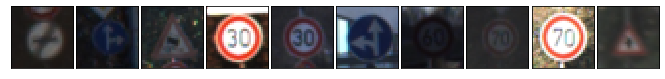

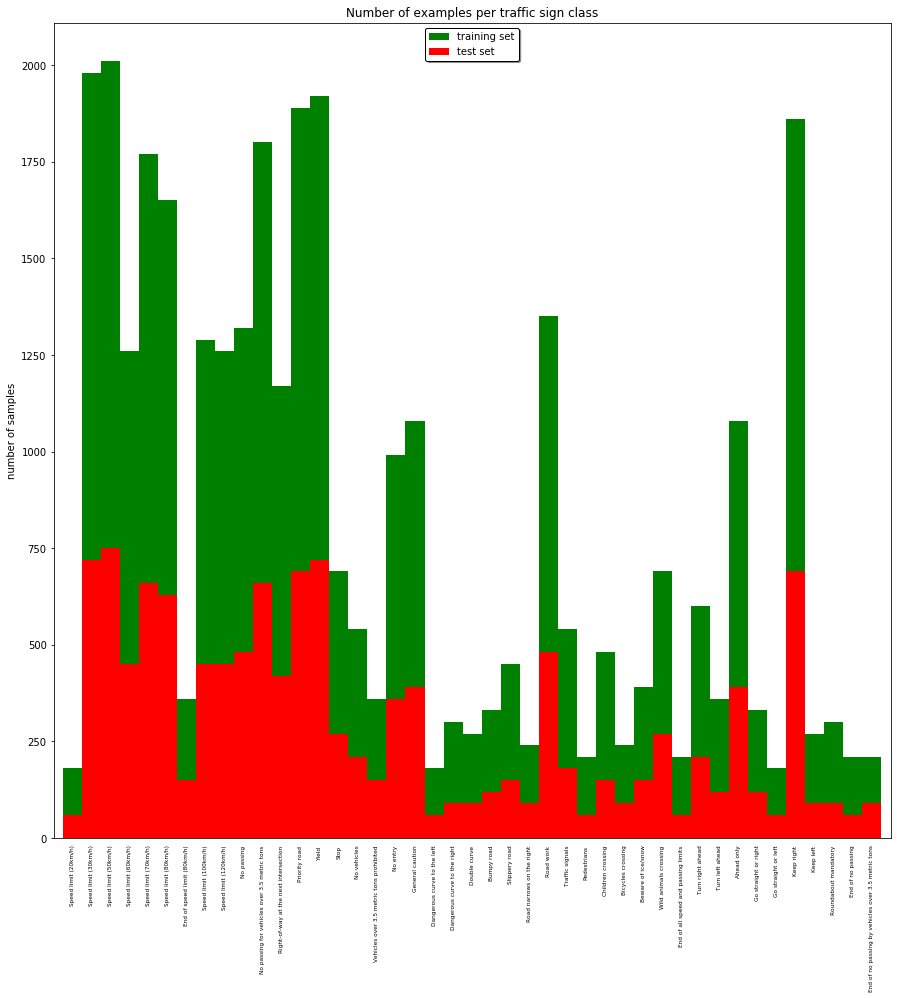

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

img_to_plot_idx = np.arange(0, 10000, 1000)
for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[img_to_plot_idx[i]], cmap='gray')

def plot_histogram(ys, num_classes, class_labels, graph_labels, title, colors, figsize=(15, 15)):
    """
    Plot a histogram of the frequency of each class in ys
    """
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    for i, y in enumerate(ys):
        ax.bar(range(num_classes), np.bincount(y), width=1.,
               align='center', color=colors[i], label=graph_labels[i])

    plt.xlim([-1, num_classes])
    ax.xaxis.grid(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.grid(False)
    ax.set_xticks(range(num_classes))
    ax.set_xticklabels(class_labels, rotation=90, size='xx-small')
    legend = ax.legend(loc='upper center', shadow=True)
    legend_frame = legend.get_frame()
    legend_frame.set_facecolor('white')
    legend_frame.set_edgecolor('black')
    plt.ylabel('number of samples')
    plt.title(title)

plot_histogram([y_train, y_test], n_classes, labels, ["training set", "test set"], "Number of examples per traffic sign class", ['green', 'red'])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
import cv2
from sklearn.preprocessing import Normalizer, StandardScaler

# Shuffle the train set
import random
idx = np.arange(X_train.shape[0])
random.seed(20)
random.shuffle(idx)
X_train = X_train[idx]
y_train = y_train[idx]

img_mean = None
img_std = None

def gray_scale(img):
    assert(img.ndim == 3)
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def normalize(mean, std, data):
    return (data - mean) / std

def preprocess(data):
    global img_mean
    global img_std

    processed_imgs = np.array(list(map(gray_scale, data)))
    processed_imgs = processed_imgs / 255

    if img_mean is None or img_std is None:
        img_mean = processed_imgs.mean()
        img_std = processed_imgs.std()
        
    processed_imgs = normalize(img_mean, img_std, processed_imgs)

    tmp_shape = processed_imgs.shape + (1, )
    return processed_imgs.reshape(tmp_shape)

In [8]:
X_train_preprocessed = preprocess(X_train)
X_valid_preprocessed = preprocess(X_valid)
X_test_preprocessed = preprocess(X_test)

### Model Architecture

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
keep_prob_conv = tf.placeholder(tf.float32)  

from models import TrafficSignNet

EPOCHS = 30
BATCH_SIZE = 256
OUTPUT_PATH = os.path.join(CURRENT_DIR, "../trained_models")

model = TrafficSignNet(x=x, y=y, keep_prob=keep_prob, keep_prob_conv = keep_prob_conv, n_out = n_classes)
model_name = "TrafficSignNet"

normalized_images = X_train_preprocessed
one_hot_y_valid = tf.one_hot(y_valid, n_classes)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(y_train)
    print("Training...\n")

    for i in range(EPOCHS):
        normalized_images, y_train = shuffle(normalized_images, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = normalized_images[offset:end], y_train[offset:end]
            sess.run(model.training_operation, 
            feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5, keep_prob_conv: 0.7})

        training_accuracy = model.evaluate(x, y, normalized_images, y_train, keep_prob, keep_prob_conv)
        validation_accuracy = model.evaluate(x, y, X_valid_preprocessed, y_valid, keep_prob, keep_prob_conv)
        print("epoch {} : Train Accuracy = {:.3f}%".format(i+1, (training_accuracy*100)))
        print("epoch {} : Validation Accuracy = {:.3f}%".format(i+1, (validation_accuracy*100)))
        print("-------------------")
    model.saver.save(sess, os.path.join(OUTPUT_PATH, model_name))
    print("Model saved")

Training...

epoch 1 : Train Accuracy = 9.380%
epoch 1 : Validation Accuracy = 7.234%
-------------------
epoch 2 : Train Accuracy = 19.733%
epoch 2 : Validation Accuracy = 16.553%
-------------------
epoch 3 : Train Accuracy = 46.231%
epoch 3 : Validation Accuracy = 42.358%
-------------------
epoch 4 : Train Accuracy = 58.145%
epoch 4 : Validation Accuracy = 52.630%
-------------------
epoch 5 : Train Accuracy = 75.746%
epoch 5 : Validation Accuracy = 71.383%
-------------------
epoch 6 : Train Accuracy = 80.402%
epoch 6 : Validation Accuracy = 77.460%
-------------------
epoch 7 : Train Accuracy = 86.695%
epoch 7 : Validation Accuracy = 83.673%
-------------------
epoch 8 : Train Accuracy = 93.011%
epoch 8 : Validation Accuracy = 90.295%
-------------------
epoch 9 : Train Accuracy = 94.695%
epoch 9 : Validation Accuracy = 90.680%
-------------------
epoch 10 : Train Accuracy = 96.431%
epoch 10 : Validation Accuracy = 93.084%
-------------------
epoch 11 : Train Accuracy = 98.773%
e

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [11]:
with tf.Session() as sess:
    model.saver.restore(sess, os.path.join(OUTPUT_PATH, model_name))
    y_pred = model.y_predict(x, X_test_preprocessed, keep_prob, keep_prob_conv)
    test_accuracy = sum(y_test == y_pred)/len(y_test)
    print("Test Accuracy = {:.1f}%".format(test_accuracy*100))

INFO:tensorflow:Restoring parameters from /home/buggy/publicWorkspace/dev/CarND-Traffic-Sign-Classifier-Project/notebooks/../trained_models/TrafficSignNet
Test Accuracy = 97.0%


### Predict the Sign Type for Each Image

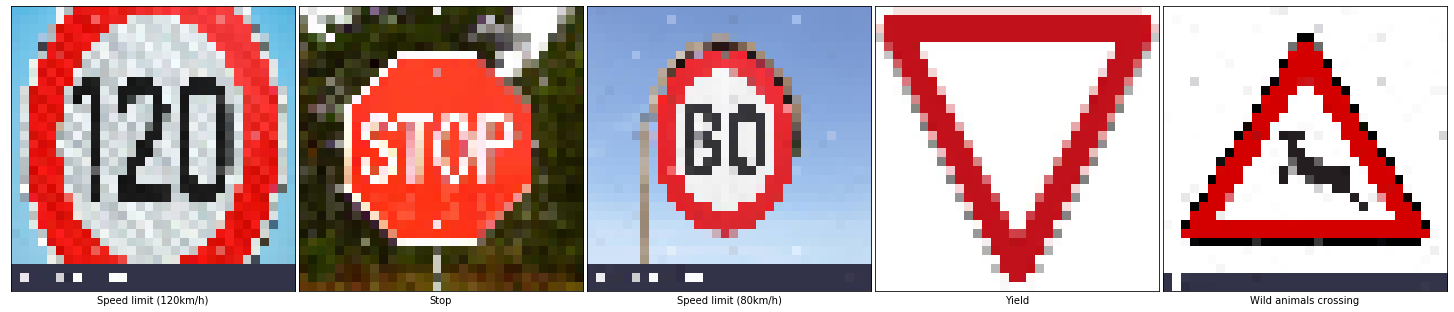

In [12]:
test_imgs = []

for i in range(1, 6):
    img = cv2.imread(os.path.join(DATA_PATH, "test{}.jpg".format(i)))
    img = cv2.resize(img, (32,32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_imgs.append(img)

label_idx = [8, 14, 5, 13, 31]
    
    
plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_imgs[i])
    plt.xlabel(labels[label_idx[i]])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.show()

test_img_preprocessed = preprocess(np.asarray(test_imgs))

### Analyze Performance

INFO:tensorflow:Restoring parameters from /home/buggy/publicWorkspace/dev/CarND-Traffic-Sign-Classifier-Project/notebooks/../trained_models/TrafficSignNet
New Images Test Accuracy = 80.0%


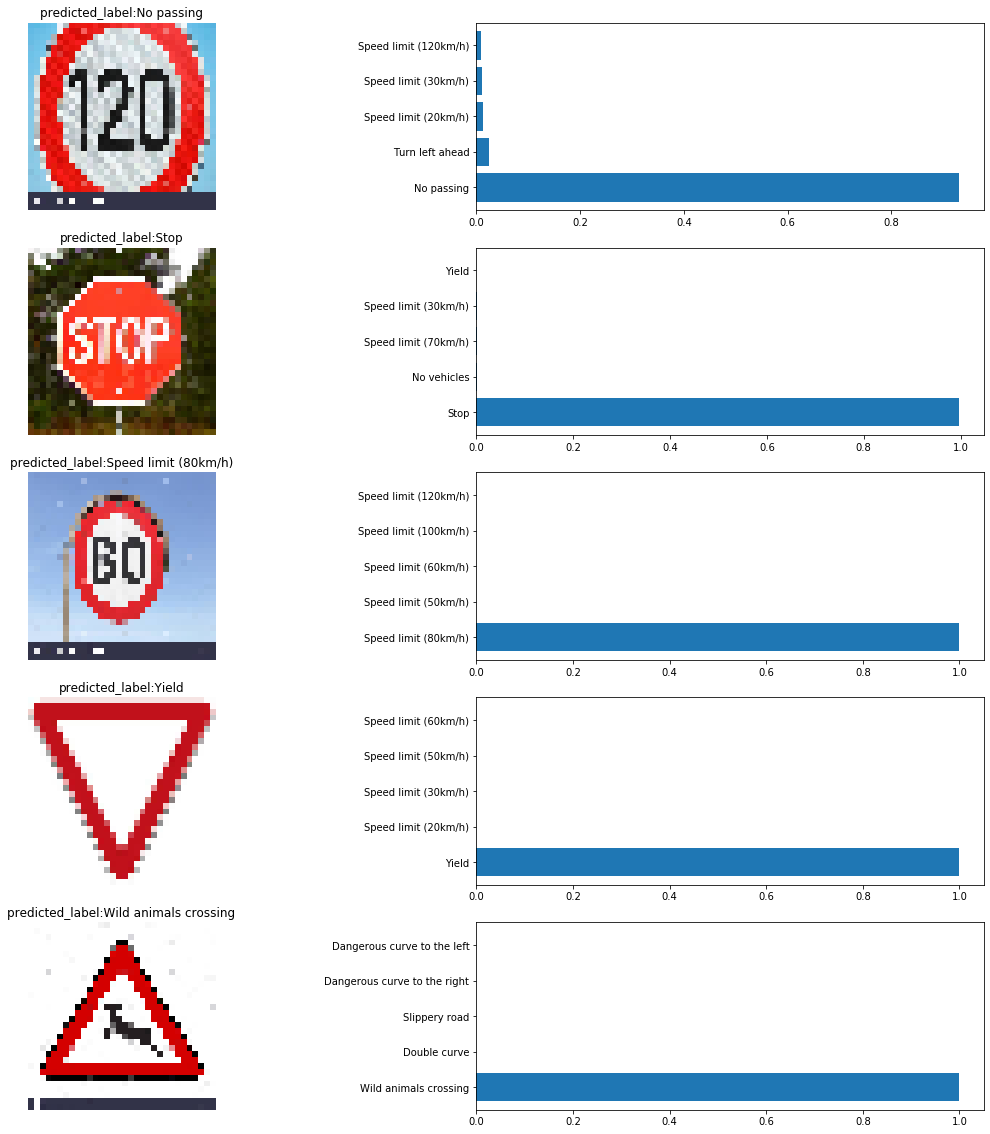

In [13]:
def predict_model(data, top_k=5):
    num_examples = len(data)
    y_pred = np.zeros((num_examples, top_k), dtype=np.int32)
    y_prob = np.zeros((num_examples, top_k))
    with tf.Session() as sess:
        model.saver.restore(sess, os.path.join(OUTPUT_PATH, model_name))
        y_prob, y_pred = sess.run(tf.nn.top_k(tf.nn.softmax(model.logits), k=top_k), 
                             feed_dict={x:data, keep_prob:1, keep_prob_conv:1})
    return y_prob, y_pred

y_prob, y_pred = predict_model(test_img_preprocessed)

test_accuracy = 0
for i in enumerate(test_img_preprocessed):
    accu = label_idx[i[0]] == np.asarray(y_pred[i[0]])[0]
    if accu == True:
        test_accuracy += 0.2
print("New Images Test Accuracy = {:.1f}%".format(test_accuracy*100))

plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(test_imgs[i]) 
    plt.title("predicted_label:" + labels[y_pred[i][0]])
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), y_prob[i, :])
    fig_labels = [labels[j] for j in y_pred[i]]
    plt.yticks(np.arange(1, 6, 1), fig_labels)
plt.show()